# Laboratorio 5
Integrantes:  
Andres de la Roca 


## Parte 1: Preparacion de datos

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [121]:
# Lectura de datos
data = pd.read_csv('UK_foods.csv')

# Rename unnamed column
data.rename(columns={'Unnamed: 0': 'Food'}, inplace=True)

data.head()

,Food,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [122]:
# Exploracion basica
data.shape
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Food       17 non-null     object
 1   England    17 non-null     int64 
 2   Wales      17 non-null     int64 
 3   Scotland   17 non-null     int64 
 4   N.Ireland  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 808.0+ bytes


C:\Users\Andrès DLR\AppData\Local\Temp\ipykernel_15688\3600559305.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

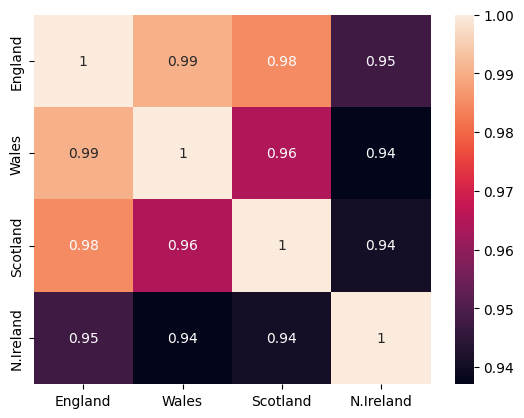

In [123]:
# Exploracion de correlaciones
sns.heatmap(data.corr(), annot=True)


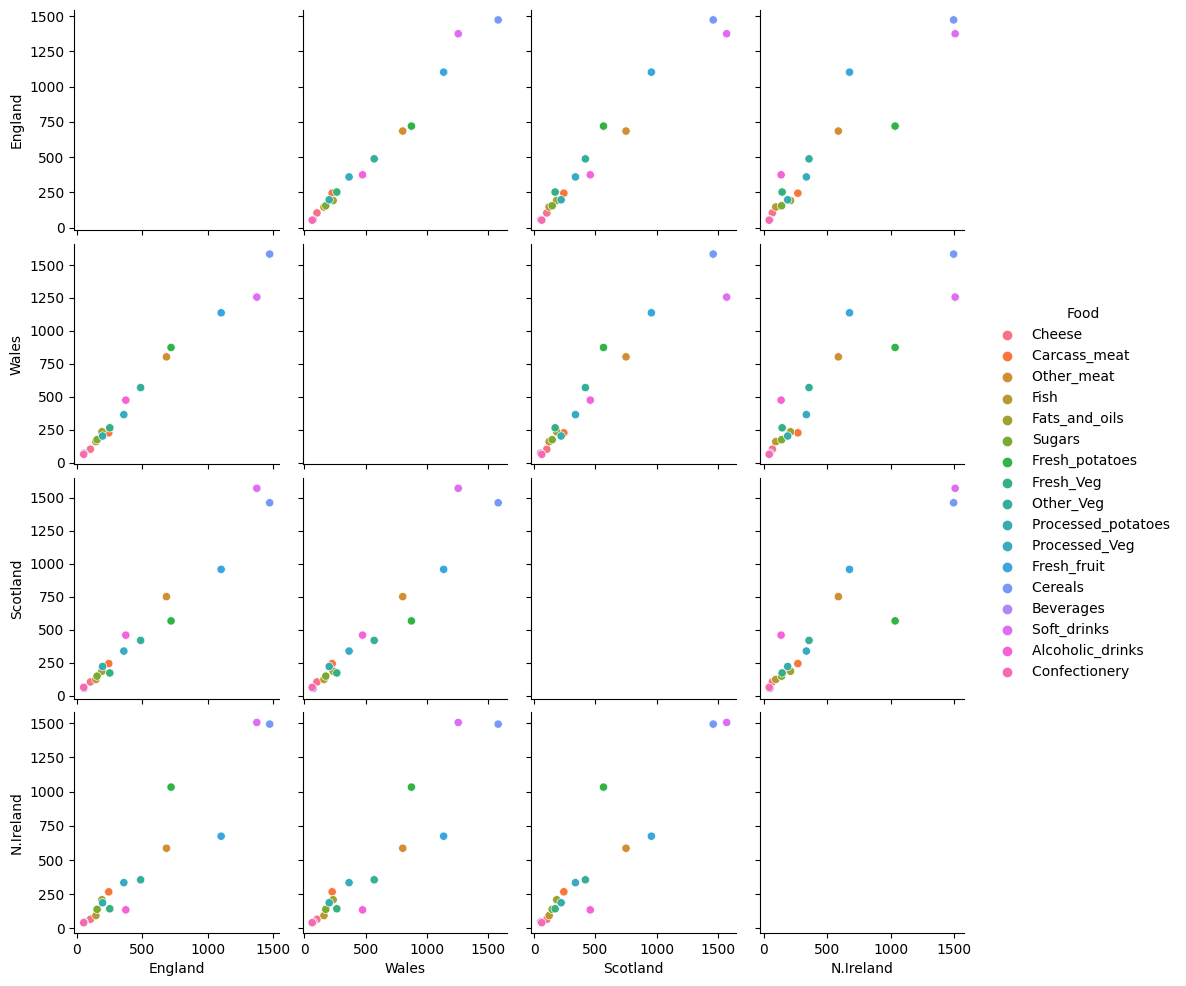

In [124]:
# Exploracion de datos
sns.pairplot(data, hue='Food')

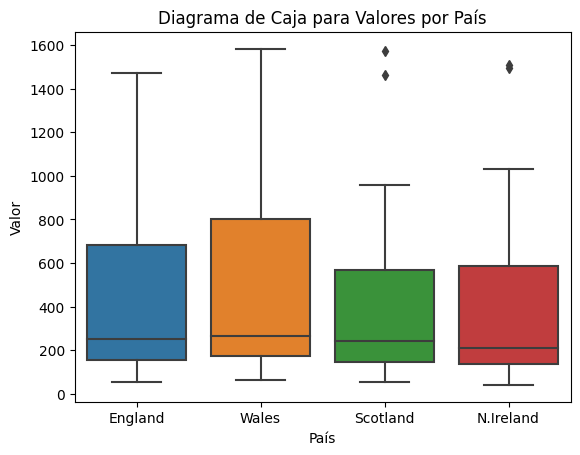

In [125]:
sns.boxplot(data=data.drop('Food', axis=1))
plt.xlabel('País')
plt.ylabel('Valor')
plt.title('Diagrama de Caja para Valores por País')
plt.show()


In [126]:
fig = px.bar(data, x='Food', y=['England', 'Wales', 'Scotland', 'N.Ireland'],
             title='Consumo de Alimentos por Categoría', labels={'value': 'Consumo'})
fig.show()

In [127]:
# Normalizacion de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
cols_to_normalize = ['England', 'Wales', 'Scotland', 'N.Ireland']
# Aplica la normalización a las columnas seleccionadas y luego transpone los datos
df_normalized_transposed = pd.DataFrame(scaler.fit_transform(data[cols_to_normalize])).T
normalized_array = scaler.fit_transform(data[cols_to_normalize]).T

# Asigna los nombres de las columnas al DataFrame transpuesto
df_normalized_transposed.columns = data['Food']

# Opcional: Reasigna los índices si es necesario
df_normalized_transposed.reset_index(drop=True, inplace=True)

In [128]:
df_normalized_transposed

Food,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
0,0.035966,0.134697,0.444993,0.065585,0.098025,0.071932,0.469676,0.140339,0.306065,0.101551,0.215797,0.739069,1.000000,0.002116,0.930889,0.226375,0.000000
1,0.025692,0.107378,0.486825,0.063241,0.112648,0.073123,0.533597,0.132411,0.333333,0.091568,0.198287,0.706851,1.000000,0.005929,0.785244,0.270751,0.000000
2,0.032916,0.124424,0.458855,0.045425,0.086241,0.061883,0.337722,0.077683,0.240290,0.109941,0.186965,0.595128,0.927584,0.000000,1.000000,0.266623,0.005925
3,0.017065,0.154266,0.372014,0.035495,0.114676,0.066894,0.677133,0.069625,0.214334,0.099659,0.200000,0.432082,0.991809,0.004096,1.000000,0.064164,0.000000


In [129]:
normalized_array

array([[0.03596615, 0.13469676, 0.44499295, 0.06558533, 0.09802539,
        0.0719323 , 0.4696756 , 0.1403385 , 0.30606488, 0.10155148,
        0.2157969 , 0.73906911, 1.        , 0.00211566, 0.93088858,
        0.22637518, 0.        ],
       [0.0256917 , 0.10737813, 0.48682477, 0.06324111, 0.11264822,
        0.07312253, 0.53359684, 0.13241107, 0.33333333, 0.09156785,
        0.19828722, 0.70685112, 1.        , 0.00592885, 0.78524374,
        0.27075099, 0.        ],
       [0.03291639, 0.12442396, 0.45885451, 0.04542462, 0.08624095,
        0.06188282, 0.33772219, 0.07768269, 0.24028966, 0.10994075,
        0.18696511, 0.59512837, 0.92758394, 0.        , 1.        ,
        0.26662278, 0.00592495],
       [0.01706485, 0.15426621, 0.37201365, 0.03549488, 0.11467577,
        0.0668942 , 0.67713311, 0.06962457, 0.21433447, 0.0996587 ,
        0.2       , 0.43208191, 0.99180887, 0.00409556, 1.        ,
        0.06416382, 0.        ]])

## Parte 2: Construccion del Autocodificador

In [130]:
from keras.models import Sequential
from keras.layers import Dense

In [131]:
codificador = Sequential()
codificador.add(Dense(units=17,
                      activation='relu',
                      input_shape = [17]))

In [132]:
decodificador = Sequential()
decodificador.add(Dense(units = 17,
                        activation='relu',
                        input_shape = [17]))

In [133]:
from keras.optimizers import SGD

In [134]:
autocodificador = Sequential([codificador,
                              decodificador])

In [135]:
# Compilacion
autocodificador.compile(loss = "mse",
                        optimizer=SGD(lr=1.5))

In [136]:
autocodificador.fit(normalized_array, normalized_array, epochs=50)

Epoch 1/50


1/1 [==============================] - 0s 229ms/step - loss: 0.1580
Epoch 2/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1574
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1567
Epoch 4/50
1/1 [==============================] - 0s 7ms/step - loss: 0.1561
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1554
Epoch 6/50
1/1 [==============================] - 0s 6ms/step - loss: 0.1548
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.1542
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 0.1536
Epoch 9/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1529
Epoch 10/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1523
Epoch 11/50
1/1 [==============================] - 0s 3ms/step - loss: 0.1517
Epoch 12/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1512
Epoch 13/50
1/1 [==============================] - 0s 2ms/step - loss: 0.1506
Epoc

In [137]:
codificado2D = codificador.predict(normalized_array)

1/1 [==============================] - 0s 42ms/step


In [138]:
mse = np.mean(np.power(normalized_array - codificado2D, 2), axis=1)

In [142]:
mse

array([0.17488659, 0.15693612, 0.16480809, 0.16845064])

In [139]:
codificado2D.shape

(4, 17)

In [140]:
codificado2D

array([[0.        , 0.47409153, 0.40475434, 0.        , 0.        ,
        0.        , 0.3587157 , 0.7402765 , 0.22051494, 0.        ,
        0.36843905, 0.        , 0.        , 0.        , 0.        ,
        0.3260539 , 0.        ],
       [0.        , 0.46871114, 0.35826364, 0.        , 0.        ,
        0.02095936, 0.37270817, 0.7036298 , 0.24893454, 0.        ,
        0.39012462, 0.01469433, 0.        , 0.        , 0.        ,
        0.29409906, 0.        ],
       [0.        , 0.4206058 , 0.38460654, 0.        , 0.        ,
        0.        , 0.33330333, 0.72130907, 0.1425577 , 0.        ,
        0.392431  , 0.        , 0.        , 0.        , 0.        ,
        0.30313653, 0.        ],
       [0.        , 0.46691418, 0.35817382, 0.        , 0.        ,
        0.        , 0.56117415, 0.691261  , 0.33145747, 0.        ,
        0.3663936 , 0.        , 0.        , 0.        , 0.        ,
        0.41762233, 0.        ]], dtype=float32)

## Parte 3: Reduccion de dimensionalidad y visualizacion

In [143]:
fig = px.scatter(x=codificado2D[:,0], y=codificado2D[:,1], color = normalized_array[:,0])
fig.show()

## Parte 4: Discusion y percepciones nuevas "Insights"